In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [2]:
im1 = np.array(Image.open('band1.gif', 'r'))
im2 = np.array(Image.open('band2.gif', 'r'))
im3 = np.array(Image.open('band3.gif', 'r'))
im4 = np.array(Image.open('band4.gif', 'r'))

In [13]:
def cov(d):
    m = d.mean(0)
    row,col=d.shape
    covm = np.zeros((col,col))       
    for j in range(col):
        for k in range(col):
            for i in range(row):
                covm[j][k] += (1/row) * (d[i][j] - m[j]) * (d[i][k] - m[k])                    
    return covm


In [14]:
data=np.transpose(np.array([im1.flatten(),im2.flatten(),im3.flatten(),im4.flatten()]))
print(data.shape)
print()
cov_matrix = cov(data)
print("Covariance matrix\n")
print(cov_matrix)

(262144, 4)

Covariance matrix

[[ 7.39053298  6.37131385  8.8583207   2.0594471 ]
 [ 6.37131385  6.60219884  8.85049459  3.57684198]
 [ 8.8583207   8.85049459 15.75005483  3.96731543]
 [ 2.0594471   3.57684198  3.96731543 37.80724223]]


In [5]:
result =np.linalg.eig(cov_matrix)
eigen_val=result[0]
eigen_vector=result[1]
eigen_val = np.diag(eigen_val)
print("...Eigen Values...")
print(eigen_val)
print()
print("...Eigen Vector...")
print(eigen_vector)

...Eigen Values...
[[40.23991753  0.          0.          0.        ]
 [ 0.         24.74500298  0.          0.        ]
 [ 0.          0.          0.5263535   0.        ]
 [ 0.          0.          0.          2.03875486]]

...Eigen Vector...
[[ 0.17494902 -0.45452022 -0.57973314  0.65323326]
 [ 0.20630134 -0.41536811  0.80494128  0.37010624]
 [ 0.28671959 -0.68303992 -0.12223959 -0.6605345 ]
 [ 0.91903453  0.3928577  -0.03219491 -0.00135768]]


In [6]:
# eigen values & eigen vectors of cov (sorted decreasing order) 

eigenValues, eigenVectors = np.linalg.eig(cov_matrix)
idx = eigenValues.argsort()[::-1]   
eigen_val = eigenValues[idx]
eigen_vector = eigenVectors[:,idx]
eigen_val = np.diag(eigen_val)
print("...Eigen Values...")
print(eigen_val)
print()
print("...Eigen Vector...")
print(eigen_vector)


...Eigen Values...
[[40.23991753  0.          0.          0.        ]
 [ 0.         24.74500298  0.          0.        ]
 [ 0.          0.          2.03875486  0.        ]
 [ 0.          0.          0.          0.5263535 ]]

...Eigen Vector...
[[ 0.17494902 -0.45452022  0.65323326 -0.57973314]
 [ 0.20630134 -0.41536811  0.37010624  0.80494128]
 [ 0.28671959 -0.68303992 -0.6605345  -0.12223959]
 [ 0.91903453  0.3928577  -0.00135768 -0.03219491]]


In [7]:

a1=eigen_vector[:,0]
a2=eigen_vector[:,1]
a3=eigen_vector[:,2]
a4=eigen_vector[:,3]


In [8]:
PC1=np.zeros((len(data),1))
PC2=np.zeros((len(data),1))
PC3=np.zeros((len(data),1))
PC4=np.zeros((len(data),1))
i=0
for x in data:
        PC1[i] = np.dot(a1.T,x)
        PC2[i] = np.dot(a2.T,x)
        PC3[i] = np.dot(a3.T,x)
        PC4[i] = np.dot(a4.T,x)
        i+=1

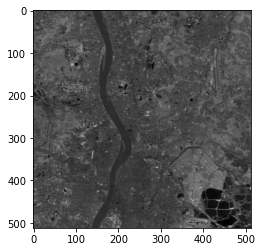

In [9]:
new_img1 = PC1.reshape((512, 512))
plt.imshow(new_img1, cmap='gray')
plt.show()

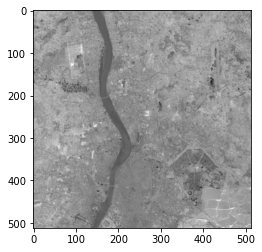

In [10]:
new_img2 = PC2.reshape((512, 512))
plt.imshow(new_img2, cmap='gray')
plt.show()

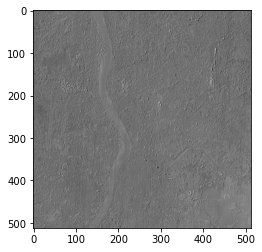

In [11]:
new_img3 = PC3.reshape((512, 512))
plt.imshow(new_img3, cmap='gray')
plt.show()

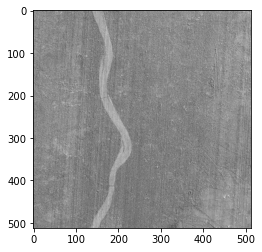

In [12]:
new_img4 = PC4.reshape((512, 512))
plt.imshow(new_img4, cmap='gray')
plt.show()